p-conta-banking


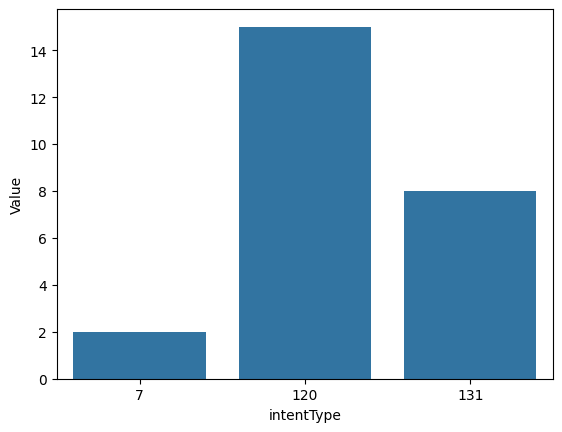

login


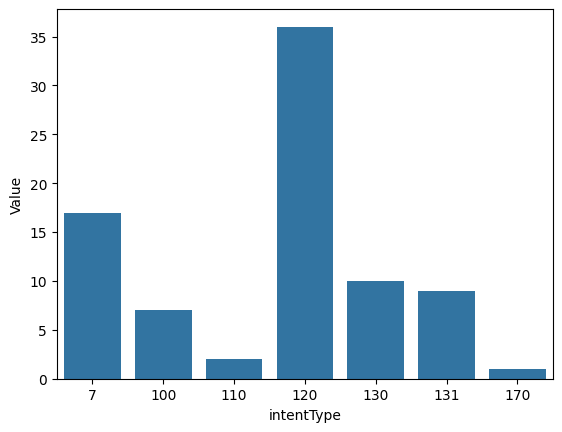

finalizador-inv


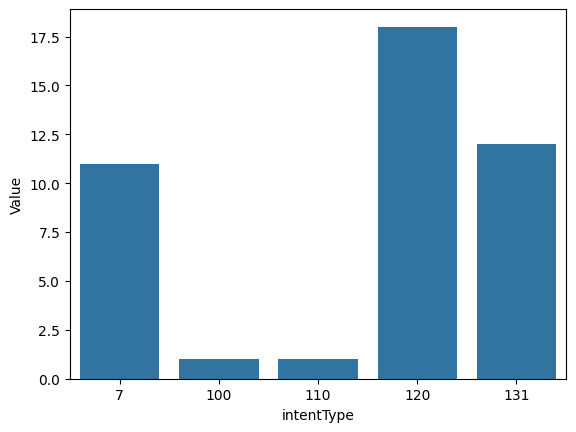

livechat


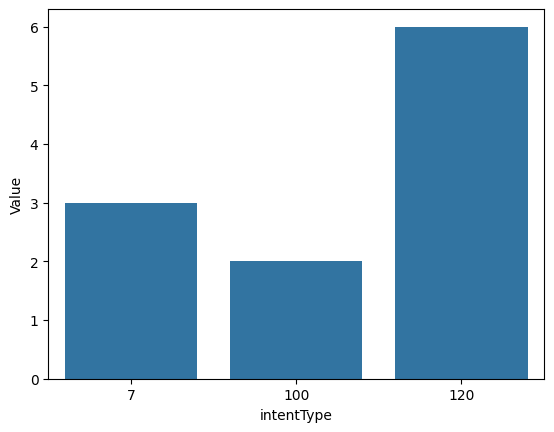

principal


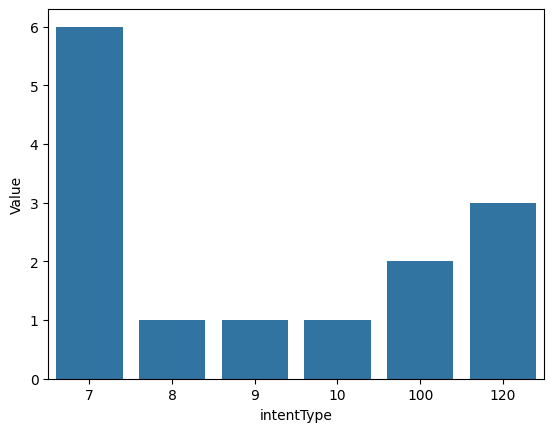

c-menu-depret


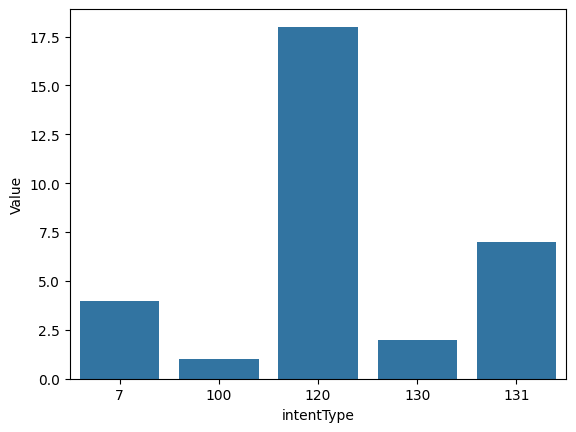

a-menu-cmb


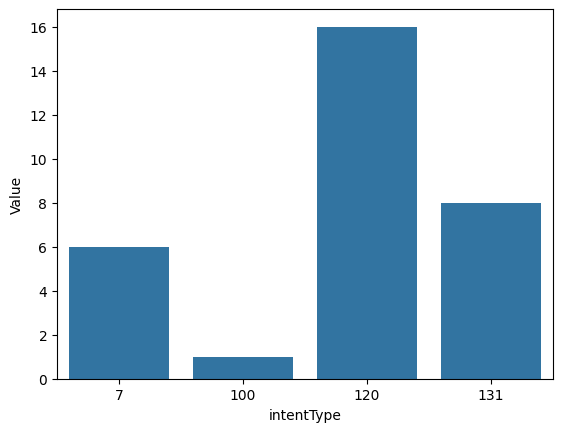

f-menu-invest


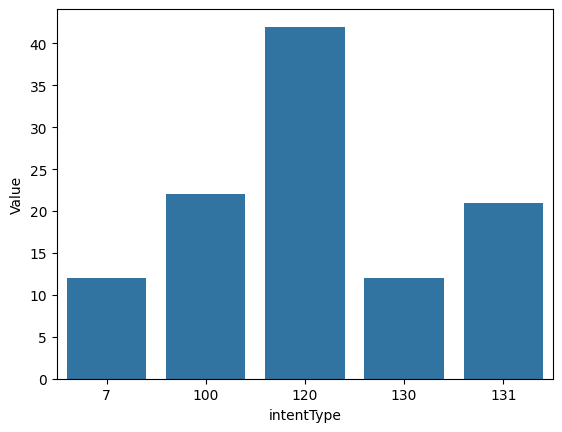

g-little-bot


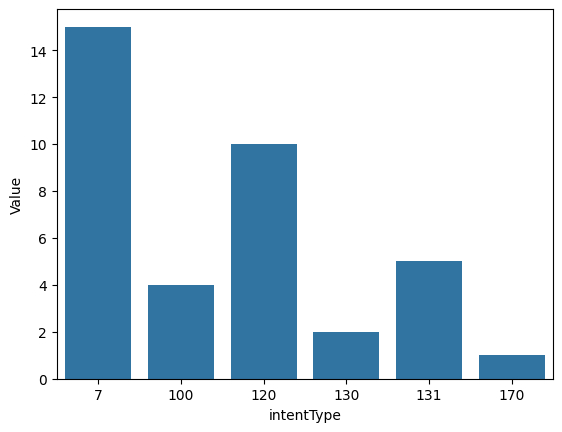

menu-principal


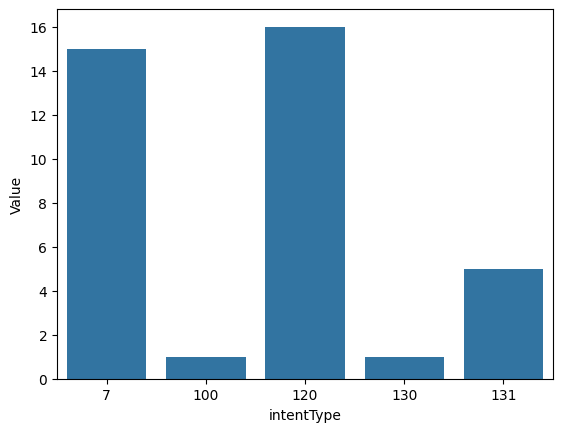

nps


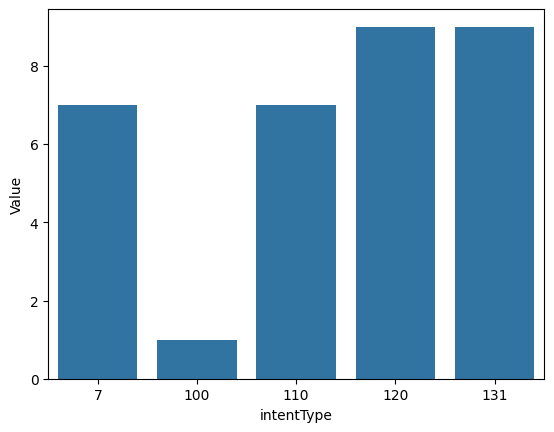

outros


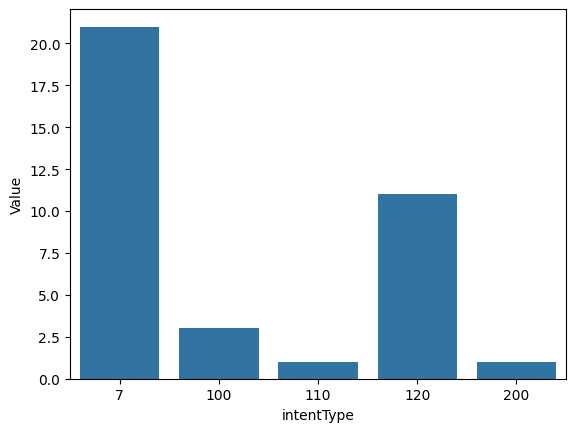

n-conta-banking


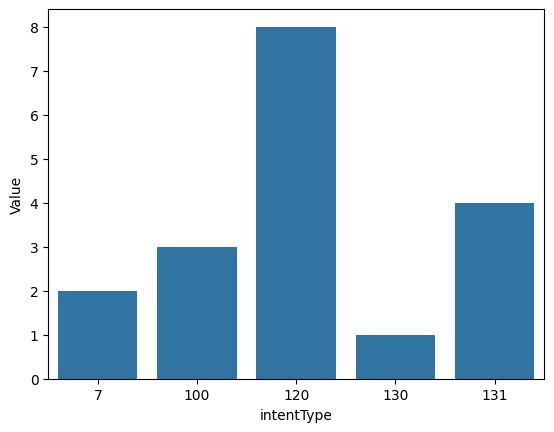

singular-client


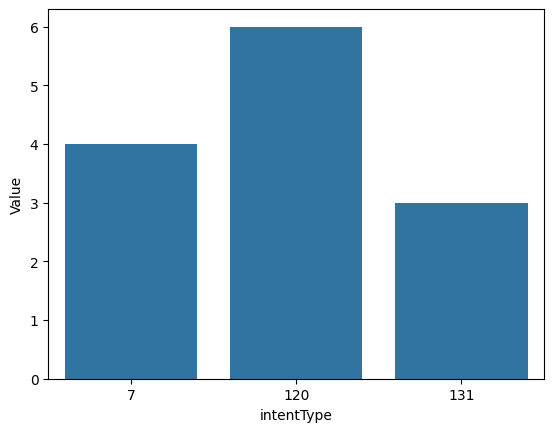

e-menu-irpf-seg


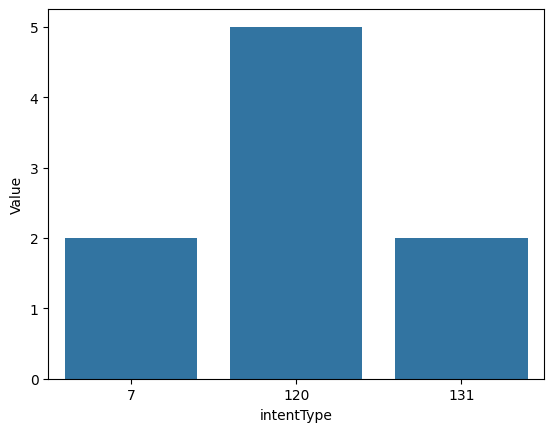

b-menu-taxas


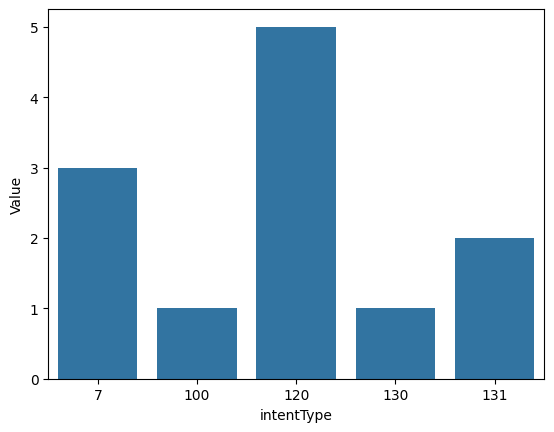

d-menu-cadastro


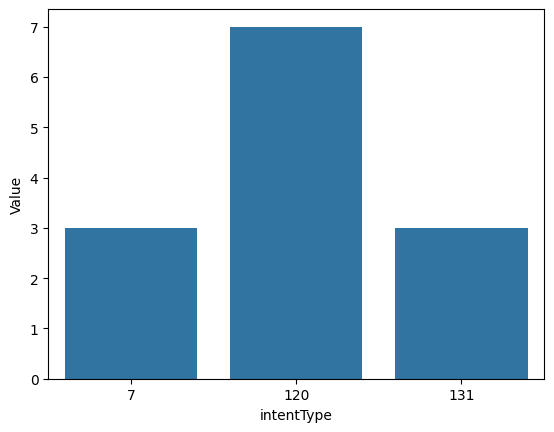

final-sessao


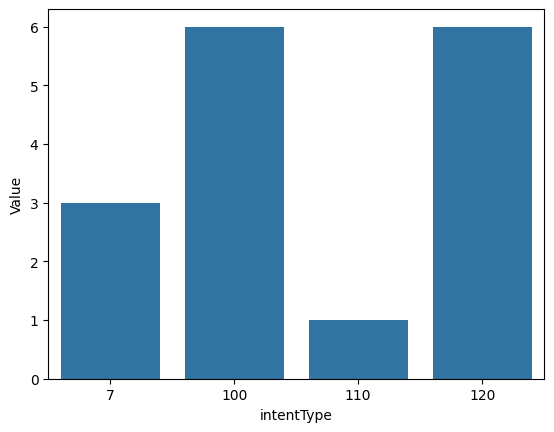

In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def verifyIntent(data):
    for g in data["groups"]: 
        countDict = {} 
        for b in (((g["blocks"])['drawflow'])['Home'])['data'].values():  
            key = recursive(b)
            if key:
                countDict[key] = countDict.get(key, 0) + 1
        df = pd.DataFrame(list(countDict.items()), columns=['intentType', 'Value'])
        print(g["groupName"])
        sns.barplot(x='intentType', y='Value', data=df)
        plt.show()
        del countDict

def recursive(d):
    if isinstance(d, dict):
        if 'intentType' in d:
            return d['intentType']
        for value in d.values():
            result = recursive(value)
            if result:
                return result
    elif isinstance(d, list):
        for item in d:
            result = recursive(item)
            if result:
                return result
    return None
    
def main():
    with open('../data-json.json', 'r', encoding='utf-8') as file:
        data = json.load(file)
    verifyIntent(data)

if __name__ == "__main__":
    main()
